In [1]:
# 1.different ways to encode nominal features
# https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
df_train = pd.read_csv('data.csv')
df_train.head()
train_len = len(df_train)

In [4]:
df_test= pd.read_excel('testdata_10%.xlsx')
df_test.head()
test_len = len(df_test)

In [5]:
# Combine X 
df = pd.concat([df_train.drop('A16',axis=1), df_test.drop('A16',axis=1)])
len(df)

566

In [6]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,b,30.83,u,g,0.00,w,0,True,v,1.25,True,1,False,202,g
1,a,58.67,u,g,4.46,q,560,True,h,3.04,True,6,False,43,g
2,a,24.5,u,g,0.50,q,824,False,h,1.50,True,0,False,280,g
3,b,27.83,u,g,1.54,w,3,True,v,3.75,True,5,True,100,g
4,b,25,u,g,11.25,c,1208,True,v,2.50,True,17,False,200,g


In [7]:
# Columns A3 and A4 are same

df.drop('A4', axis=1, inplace=True)
df.replace('?',np.NaN,inplace=True)

In [8]:
df_test.dtypes

A1      object
A2     float64
A3      object
A4      object
A5     float64
A6      object
A7       int64
A8        bool
A9      object
A10    float64
A11       bool
A12      int64
A13       bool
A14      int64
A15     object
A16    float64
dtype: object

26.676153846153845


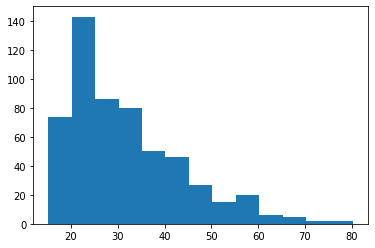

In [9]:
# Calculate max frequency bar value to fill A2 null values
bins = 13
data = df.loc[df['A2'].notnull(), 'A2'].astype(np.float64).tolist()
y, x, _ = plt.hist(data, histtype='bar', bins=bins)
y_max = y.max()
idx = np.where(y == y_max)[0][0]
A2_fill_value = x[idx] + bins/2
print(A2_fill_value)

In [10]:
# Calculate mean of A14 to fill null values
A14_fill_value = df.loc[df['A14'].notnull(), 'A14'].astype(np.float64).mean()

In [11]:
df=df.fillna({'A2':A2_fill_value,'A14':A14_fill_value})
df=df.fillna({'A1':'b', 'A3':'u', 'A6':'c', 'A9':'v'})

In [12]:
df.A2 = df.A2.astype(np.float64)
df.A14 = df.A14.astype(np.int64)


In [13]:
# encode A16 lables
df_train['A16'] = df_train['A16'].map({label:idx for idx,label in enumerate(np.unique(df_train['A16']))})
df['A1'] = df['A1'].map({label:idx for idx,label in enumerate(np.unique(df['A1']))})
df['A8'] = df['A8'].map({label:idx for idx,label in enumerate(np.unique(df['A8']))})
df['A11'] = df['A11'].map({label:idx for idx,label in enumerate(np.unique(df['A11']))})
df['A13'] = df['A13'].map({label:idx for idx,label in enumerate(np.unique(df['A13']))})



In [14]:
df.head()

,A1,A2,A3,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,30.83,u,0.00,w,0,1,v,1.25,1,1,0,202,g
1,0,58.67,u,4.46,q,560,1,h,3.04,1,6,0,43,g
2,0,24.50,u,0.50,q,824,0,h,1.50,1,0,0,280,g
3,1,27.83,u,1.54,w,3,1,v,3.75,1,5,1,100,g
4,1,25.00,u,11.25,c,1208,1,v,2.50,1,17,0,200,g


In [15]:
x_A3=pd.get_dummies(df[['A3']],drop_first=True)
x_A6=pd.get_dummies(df[['A6']],drop_first=True)
x_A9=pd.get_dummies(df[['A9']],drop_first=True)
x_A15=pd.get_dummies(df[['A15']],drop_first=True)
df=pd.concat([df['A1'],df['A2'],x_A3,df['A5'],x_A6,df['A7'],df['A8'],x_A9,df['A10'],df['A11'],df['A12'],df['A13'],df['A14'],x_A15],axis=1)



In [16]:
#df.head()

In [17]:
#df.columns

In [18]:
#df.head()

In [19]:
#-------------- Feature scaling --------------------------------------------
# random forest, decision trees do not need feature scaling

stdsc = StandardScaler()

x = df.values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = stdsc.fit_transform(x)
df = pd.DataFrame(x_scaled)


In [20]:
# Separate back to train_X, and test_X and join train_y to train_X

df_train = pd.concat([df.iloc[0:-test_len], df_train['A16']], axis=1)
print("train size: ", len(df_train))

df_test = df.iloc[-test_len:]
print("test size: ",len( df_test))

train size:  552
test size:  14


In [21]:
#df_train.head()
#df_train.columns

In [22]:
feature_cols=df_train.drop('A16', axis=1).columns

#split dataset in features and target variable
X = df_train[feature_cols] # Features
y = df_train.A16 # Target variable

In [23]:
# Split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
X_train = X
y_train = y
X_test = df_test

In [24]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.655204,-0.079232,0.559665,-0.55422,-0.959997,-0.496685,-0.244796,-0.210429,-0.2011,-0.286737,...,-0.059549,0.861126,-0.111903,-0.321305,0.87994,-0.309071,-0.895850,0.087991,-0.10351,-0.311286
1,-1.526241,2.231408,0.559665,-0.55422,-0.076669,-0.496685,-0.244796,-0.210429,-0.2011,-0.286737,...,-0.059549,-1.161270,-0.111903,0.187311,0.87994,0.661706,-0.895850,-0.799456,-0.10351,-0.311286
2,-1.526241,-0.604603,0.559665,-0.55422,-0.860969,-0.496685,-0.244796,-0.210429,-0.2011,-0.286737,...,-0.059549,-1.161270,-0.111903,-0.250270,0.87994,-0.503226,-0.895850,0.523343,-0.10351,-0.311286
3,0.655204,-0.328223,0.559665,-0.55422,-0.654991,-0.496685,-0.244796,-0.210429,-0.2011,-0.286737,...,-0.059549,0.861126,-0.111903,0.389053,0.87994,0.467551,1.116258,-0.481314,-0.10351,-0.311286
4,0.655204,-0.563105,0.559665,-0.55422,1.268127,2.013348,-0.244796,-0.210429,-0.2011,-0.286737,...,-0.059549,0.861126,-0.111903,0.033874,0.87994,2.797416,-0.895850,0.076828,-0.10351,-0.311286


In [25]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
552,0.655204,0.073483,-1.786783,1.804339,0.822502,-0.496685,-0.244796,-0.210429,-0.2011,-0.286737,...,-0.059549,-1.161270,-0.111903,0.815268,0.879940,-0.503226,1.116258,-0.179917,-0.10351,-0.311286
553,0.655204,-0.971450,0.559665,-0.554220,-0.935240,-0.496685,-0.244796,-0.210429,-0.2011,-0.286737,...,-0.059549,0.861126,-0.111903,-0.392341,-1.136441,-0.309071,-0.895850,0.300086,-0.10351,-0.311286
554,0.655204,-0.971450,0.559665,-0.554220,-0.910483,-0.496685,-0.244796,-0.210429,-0.2011,-0.286737,...,-0.059549,0.861126,-0.111903,-0.640967,-1.136441,-0.503226,-0.895850,0.076828,-0.10351,-0.311286
555,0.655204,-0.797987,0.559665,-0.554220,-0.514372,-0.496685,-0.244796,-0.210429,-0.2011,-0.286737,...,-0.059549,0.861126,-0.111903,-0.640967,-1.136441,-0.503226,-0.895850,-0.146429,-0.10351,-0.311286
556,-1.526241,-0.376361,0.559665,-0.554220,-0.902561,-0.496685,-0.244796,-0.210429,-0.2011,-0.286737,...,-0.059549,-1.161270,-0.111903,-0.640967,-1.136441,-0.309071,1.116258,0.478691,-0.10351,-0.311286


In [26]:
#-------------------- Try different models ------------------------------------------------------------------

In [27]:
# Create Decision Tree classifer object
dtc_model_1 = DecisionTreeClassifier(max_depth=2)

# Train Decision Tree Classifer
dtc_model_1.fit(X_train,y_train)

#Predict the response for test dataset
dtc_pred = dtc_model_1.predict(X_test)

print(dtc_pred.tolist())

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]


In [28]:
dtc_model_2 = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
dtc_model_2.fit(X_train,y_train)

#Predict the response for test dataset
dtc_pred_2 = dtc_model_2.predict(X_test)

print(dtc_pred_2.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]


In [29]:
#Create a Gaussian Classifier
gnb_model = GaussianNB()

#Train the model using the training sets
gnb_model.fit(X_train, y_train)

#Predict the response for test dataset
gnb_pred = gnb_model.predict(X_test)


print(gnb_pred.tolist())

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]


In [30]:
knn_model = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)

print(knn_pred.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]


In [31]:
rfc_model=RandomForestClassifier(n_estimators=200, random_state = 17)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc_model.fit(X_train,y_train)

rfc_pred=rfc_model.predict(X_test)

print(rfc_pred.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]


In [32]:
#Create a svm Classifier
svm_model = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_model.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = svm_model.predict(X_test)

print(svm_pred.tolist())

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]


In [33]:
lr_model = LogisticRegression()

# fit the model with data
lr_model.fit(X_train,y_train)

lr_pred=lr_model.predict(X_test)

print(lr_pred.tolist())

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
